In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [2]:
# Lendo o Dataset
DATA = "datasets/Mall_Customers.csv"

df = pd.read_csv(DATA, sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Selecionando as features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].values

# Transformando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

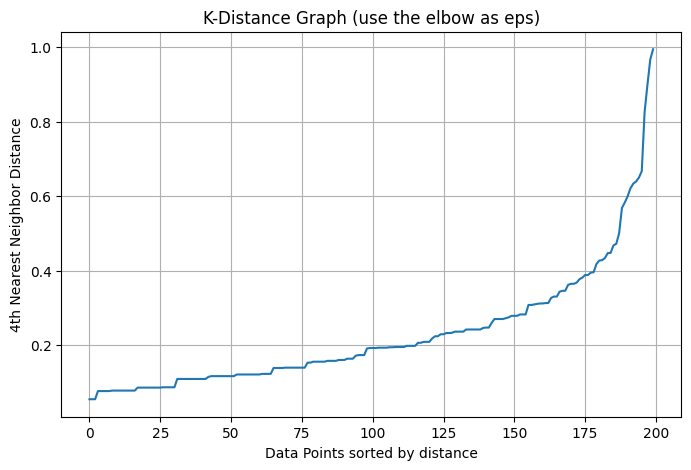

In [4]:
# Plotando o K-distance para selecionar o eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-Distance Graph (use the elbow as eps)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

/tmp/ipykernel_29014/3203376258.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


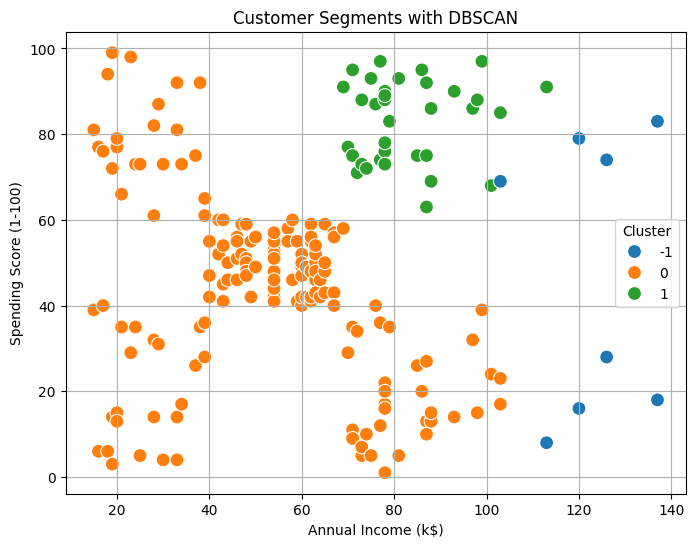

In [8]:
# Aplicando o DBSCAN para eps = 0,5
dbscan = DBSCAN(eps=0.5, min_samples=4)
labels = dbscan.fit_predict(X_scaled)

# Adicionando os clusteres ao dataset para visualização
df['Cluster'] = labels

# Visualização

plt.figure(figsize=(8,6))
palette = sns.color_palette()

sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    palette=palette, 
    data=df, 
    s=100, 
    legend='full'
)

plt.title('Customer Segments with DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()